In [1]:
#### 유튜브 : https://youtu.be/jeW0oIQYFbU   
#### 피드백은 rlaalstn1504@naver.com 여기로 주시면 감사하겠습니다~

## 작업형 제1유형 : 단답형 답을 가진 변수를 print 명령어로 출력하는 코드 제출 
* mtcars 데이터셋(data/mtcars.csv)의 qsec 컬럼을 최소최대 척도(Min-Max Scale)로 변환한 후 0.5보다 큰 값을 가지는 레코드 수를 구하시오.
* dataset 위치 : data/mtcars.csv

### 예제 1 풀이

-  실기환경 : https://www.dataq.or.kr/www/board/view.do?bbsKey=eyJiYnNhdHRyU2VxIjoxLCJiYnNTZXEiOjUwOTM0M30=&boardKind=notice

### 예제 1 풀이방법 1  : lambda 함수를 통한 수식 직접 구현

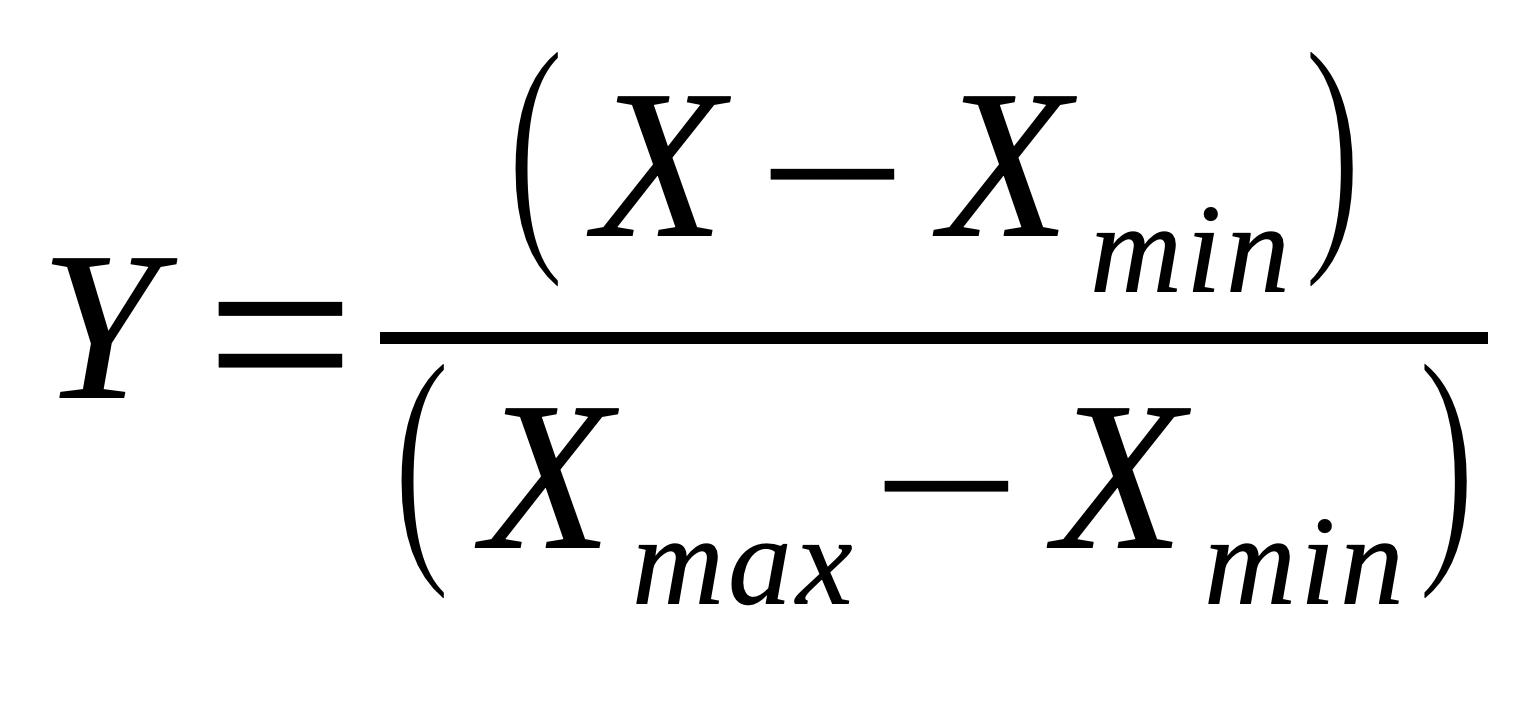

In [2]:
from IPython.display import Image  
Image('minmax.png',width='50%') 
# 이미지출처 : https://conanmoon.medium.com/%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B3%BC%ED%95%99-%EC%9C%A0%EB%A7%9D%EC%A3%BC%EC%9D%98-%EB%A7%A4%EC%9D%BC-%EA%B8%80%EC%93%B0%EA%B8%B0-%EC%97%AC%EC%84%AF%EB%B2%88%EC%A7%B8-%EC%9D%BC%EC%9A%94%EC%9D%BC-b3f2992c5ffd

### - lambda 함수 기본 형태 
### - df['colume'] = df['colume'].apply(lambda x: 'x에 적용할 식 입력') 
### - ex) df['colume'] = df['colume'].apply(lambda x: x+3)

In [3]:
import pandas as pd  
df = pd.read_csv('data/mtcars.csv')  # 데이터 로드

In [4]:
df['qsec'] = df['qsec'].apply(lambda x:(x-df['qsec'].min())/(df['qsec'].max()-df['qsec'].min()))

In [5]:
print(df[df['qsec']>0.5].shape[0])

9


### 예제 2 풀이방법 2  : sklearn 라이브러리를 통한 구현

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
df = pd.read_csv('data/mtcars.csv')  # 데이터 로드

In [8]:
scaler = MinMaxScaler() # 스케일러 객체 생성 

In [9]:
a = scaler.fit_transform(df[['qsec']]) # 생성한 객체를 통해서 변환 진행

In [10]:
print(a[a>0.5].shape[0])

9


## 작업형 제1유형 예상문제

In [11]:
import pandas as pd  
train_x = pd.read_csv('data/X_train.csv',encoding='cp949') 
train_y = pd.read_csv('data/y_train.csv',encoding='cp949')
test_x = pd.read_csv('data/X_test.csv',encoding='cp949')

### 예상문제  데이터 전처리 작업 - 데이터 정제하기

#### 1-1 X_train 환불금액의 누락값(유실값)의 총 개수를 구하시오

In [12]:
print(train_x.isnull().sum().sum())

2295


In [13]:
print(train_x['환불금액'].isnull().sum())

2295


#### 1-2 X_train 환불금액의 결측치를 10000 으로 채우고, 환불금액의 평균을 구하시오    

In [14]:
print(train_x['환불금액'].fillna(10000).mean())

8296342.934285714


#### 1-3 X_train 환불금액의 결측치를 앞의 값으로 채우고, 환불금액의 평균을 구하시오    

In [15]:
print(train_x['환불금액'].fillna(method='pad').mean())

24237601.04


#### 1-4  주구매지점의 unique값(종류)의 총 개수를 구하시오

In [16]:
print(train_x['주구매지점'].nunique())

24


#### 1-5 train_x 를 총구매액 순서가 큰 순으로 정렬하였을때 1501번째 고객의 주구매상품을 출력하시오

In [17]:
print(train_x.sort_values('총구매액',ascending=False)[1500:1501]['주구매상품'].values[0])

디자이너


#### 1-6 train_x 주구매지점이 강남점인 고객들의 평균 내점일수를 출력하시오

In [18]:
a = train_x.groupby('주구매지점').mean().reset_index()

In [19]:
print(a[a['주구매지점']=='강남점']['내점일수'].values[0])

15.144827586206896


### 예상문제  데이터 모형 평가 작업 - 구축된 모형 평가하기

#### train_y 의 gender를 모두 1로 예측했을 경우, precision + recall 값을 print하시오 

In [20]:
from sklearn.metrics import precision_score, recall_score

In [21]:
train_y['gender'].shape

(3500,)

In [22]:
import numpy as np
one = np.ones(3500) # 값이 1 인 배열을 3500개 만들겠다 

In [23]:
print(precision_score(train_y['gender'],one) + recall_score(train_y['gender'],one))

1.376


수고하셨습니다~